In [96]:
# Add your imports here!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# Read data
data = pd.read_csv("Data/heart_2020_cleaned.csv")

In [98]:
data['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [99]:
data["Smoking"] = data["Smoking"].map(dict(Yes=1, No=0))
data["AlcoholDrinking"] = data["AlcoholDrinking"].map(dict(Yes=1, No=0))
data["DiffWalking"] = data["DiffWalking"].map(dict(Yes=1, No=0))
data["Stroke"] = data["Stroke"].map(dict(Yes=1, No=0))
# data["Diabetic"] = data["Diabetic"].map(dict(Yes=1, No=0))
data["PhysicalActivity"] = data["PhysicalActivity"].map(dict(Yes=1, No=0))
data["Asthma"] = data["Asthma"].map(dict(Yes=1, No=0))
data["KidneyDisease"] = data["KidneyDisease"].map(dict(Yes=1, No=0))
data["SkinCancer"] = data["SkinCancer"].map(dict(Yes=1, No=0))
data["Sex"] = data["Sex"].map(dict(Female=1, Male=0))
data["HeartDisease"] = data["HeartDisease"].map(dict(Yes=1, No=0))
data["AgeCategory"] = data["AgeCategory"].map({"18-24":0, "25-29":1, "30-34":2, "35-39":3, "40-44":4, "45-49":5, "50-54":6, "55-59":7, "60-64":8, "65-69":9, "70-74":10, "75-79":11, "80 or older":12})
data["GenHealth"] = data["GenHealth"].map({"Poor":0, "Fair":1, "Good":2, "Very good":3, "Excellent":4})

In [100]:
race_dummies = pd.get_dummies(data["Race"])
diabetes_dummies = pd.get_dummies(data['Diabetic'])

In [101]:
data = pd.concat([data, race_dummies], axis = 1)
data = pd.concat([data, diabetes_dummies], axis = 1)
data = data.drop(columns = 'Race')
data = data.drop(columns = 'Diabetic')
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'American Indian/Alaskan Native', 'Asian', 'Black',
       'Hispanic', 'Other', 'White', 'No', 'No, borderline diabetes', 'Yes',
       'Yes (during pregnancy)'],
      dtype='object')

Here is a markdown cell



In [102]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,4,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,...,0,0,0,1,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [94]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

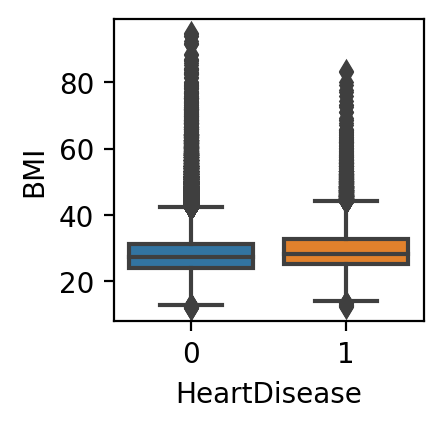

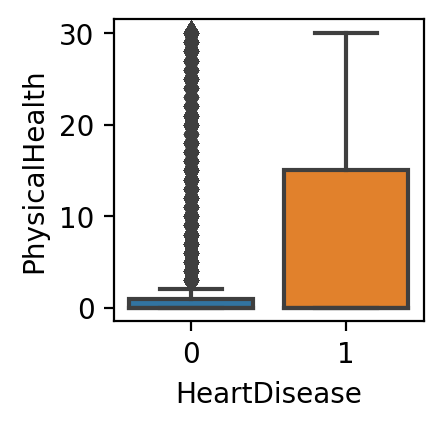

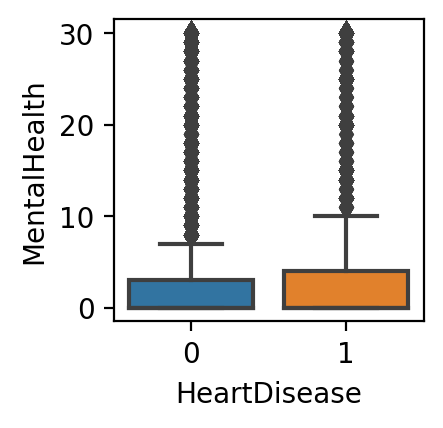

In [10]:
numeric_variables = ['BMI', 'PhysicalHealth', 'MentalHealth']
for i in numeric_variables:
    plt.figure(figsize=(2, 2), dpi=200)
    sns.boxplot(data = data, x = 'HeartDisease', y = i)
    plt.show()

In [67]:
import plotly.express as px

In [68]:
hd_yes = data[data['HeartDisease'] == "Yes"]
px.pie(hd_yes, names = "AgeCategory")

In [0]:
# this visualization shows the pecentage of people in our data set with heart disease in each age category. It shows that the amount of people with heart disease gradually goes down with the exception of one outlier (the 65-69 category).